# Pymaceuticals Inc.
---

### Analysis

A total of 249 mice identified with SCC tumors were being put in an animal study by Pymaceuticals Inc. During 45 days, tumor development was observed and documented. Capomulin is the drug or interest. The following summary is comparing Capomulin against the rest of the drugs. Please, note that the following results are based on 248 mice.

1. Only 2 treatments show tumor size reduction over the 45 day-period: Capomulin and Ramicane. Capomulin reduces 20% the tumor (on average), whereas Ramicane reduces it by 19%.
2. Mice with less weight have very tumor reduction, compared to the heavier mice. No results shown on the same drugs being used on heavier mice.
3. Age is not a factor that would influence the tumor reduction.
4. Two medicaments are not showing improvements over the study period, which are Stelasyn and Naftisol.
 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how="left", on =["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#1. Calculate the number of unique mouse in the given database
unique_mice = len(combined_data_df["Mouse ID"].unique())
unique_mice


249

In [3]:
#2. Check if the data has any duplicates for later deletion
duplicate_data= combined_data_df[combined_data_df.duplicated()]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df["Mouse ID"] == "g989",:]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate ID mouse.
cleaned_data_df = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"] == "g989"].index)
cleaned_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#Confirm that the dataframe is clean and that the information of the duplicate mouse id is deleted correctly
unique_mice = len(cleaned_data_df["Mouse ID"].unique())
unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
#For this exercise, the functions that are already in the system were used, instead of manually doing each calculation.
drug_regimen_mean = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_regimen_median = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_regimen_var = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_regimen_stnd_var = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_regimen_sem = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Create a new dataframe with the statistics calculated above, using concatenate option that is available on pandas
summary = pd.concat([drug_regimen_mean, drug_regimen_median, drug_regimen_var, drug_regimen_stnd_var, drug_regimen_sem], axis=1)

#Change the titles of each column as requested in the challenge.
summary.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.",
                                    "Tumor Volume Std. Err."]
#making sure the columns were correctly renamed.
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:

# Using the aggregation method, produce the same summary statistics in a single line
agg_columns = cleaned_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# # Assemble the resulting series into a single summary DataFrame and make sure it works
agg_columns

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

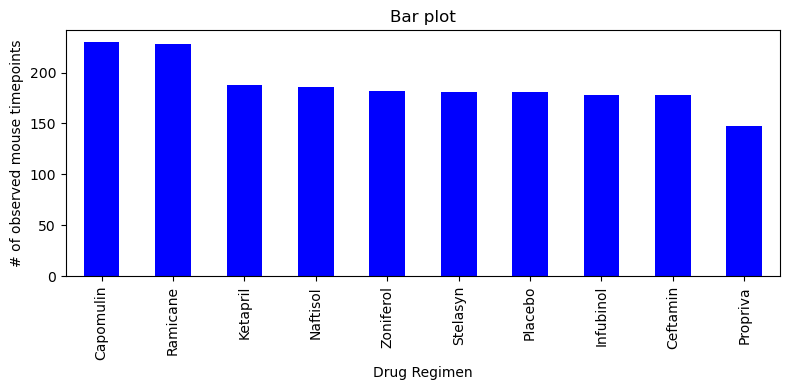

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get total mice per regimen
drug_data = cleaned_data_df["Drug Regimen"].value_counts()

#Configure plot, figsize, title, and axis labels
figure1 = drug_data.plot(kind="bar", facecolor="blue", figsize=(8,4),
                                title="Bar plot",
                                xlabel="Drug Regimen",
                                ylabel="# of observed mouse timepoints")

#making sure that the graph is appearing correctly with the given space.
plt.tight_layout()
plt.show()


In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#data set
x_drugs = cleaned_data_df["Drug Regimen"].unique()
y_drugs = cleaned_data_df["Drug Regimen"].value_counts()

# Creating bar chart using pyplot
plt.bar(x_drugs, y_mice, facecolor="red", alpha=0.40, align="center")
plt.xticks(rotation=45)
plt.title("Bar plot")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timepoints")
plt.tight_layout
plt.show()


NameError: name 'y_mice' is not defined

Text(0, 0.5, 'Sex')

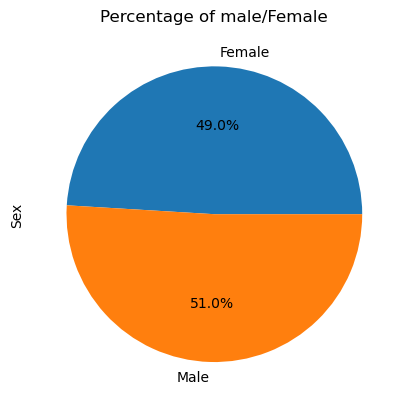

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Split up our data into groups based on mouse gender (Female, Male)
mouse_gender = cleaned_data_df.groupby(["Sex"])["Mouse ID"].count()

#Format the pie chart to display
pie_chart = mouse_gender.plot(kind="pie", y="Sex", title="Percentage of male/Female",autopct="%.1f%%")
pie_chart.set_ylabel("Sex")


Text(0.5, 1.0, 'Percentage of Male and Female mice in the study')

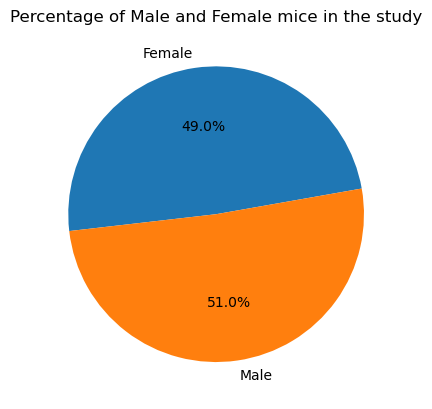

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Creating a variable for gender
gender=["Female", "Male"]

#Format the pie chart to display
plt.pie(mouse_gender, labels= gender, autopct="%1.1f%%", startangle= 10)
plt.title("Percentage of Male and Female mice in the study")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and CeftaminDrug Regimen

# Option 1. First, I created 4 separate databases (one per drug) and calculated the indicators one by one.
# Start by getting the last (greatest) timepoint for each mouse for Capomulin
capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Capomulin"]
capomulin_max_timepoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint of Capomulin
merged_cleaned_capomulin = pd.merge(capomulin_max_timepoint,cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_cleaned_capomulin


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse for Ramicane
ramicane_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ramicane"]
ramicane_max_timepoint = ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint of Ramicane
merged_cleaned_ramicane = pd.merge(ramicane_max_timepoint,cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_cleaned_ramicane

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [63]:
#Option 2. Create a loop to store the max timepoint of all drugs for later filter by treatment. 
#This is the most efficient way to do it, but I could not land to this conclusion sooner, so I will use this option 2 to do the calculate the quartiles, find outliers and iqr.
# Start by getting the last (greatest) timepoint for each mouse for Infubinol
infubinol_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Infubinol"]
infubinol_max_timepoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint of Ramicane
merged_cleaned_infubinol = pd.merge(infubinol_max_timepoint,cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_cleaned_infubinol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse for Ceftamin
ceftamin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"]=="Ceftamin"]
ceftamin_max_timepoint = ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint of Ramicane
merged_cleaned_ceftamin = pd.merge(ceftamin_max_timepoint,cleaned_data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_cleaned_ceftamin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [43]:
max_timepoint_all_data = cleaned_data_df.groupby(["Mouse ID"])["Timepoint"].max()
merge_max_into_data = pd.merge(max_timepoint_all_data,cleaned_data_df, on=["Mouse ID","Timepoint"], how="left")
merge_max_into_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [64]:
# Create empty list to fill with tumor vol data (for plotting). 
drug_options = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_tum_vol = []
#Loop through the list to find only the drugs of interest, listed in drug options
for drugs in drug_options:
    four_drugs_data = merge_max_into_data.loc[merge_max_into_data["Drug Regimen"]==drugs]
    #identify the outliers
    quartiles = four_drugs_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (0.25*iqr)
    upper_bound = upper_quartile + (0.75*iqr)
    outliers = four_drugs_data.loc[(four_drugs_data["Tumor Volume (mm3)"] < lower_bound) | (merge_max_into_data["Tumor Volume (mm3)"] > upper_bound)]
    # Print Outliers for each drug analyzed
    print(f"{drugs} outliers: {outliers['Tumor Volume (mm3)']}")
    # add subset
    last_tum_vol.append(four_drugs_data["Tumor Volume (mm3)"])
    four_drugs_data
    
    

Capomulin outliers: 80     47.685963
121    28.430964
162    46.539206
174    23.343598
226    28.484033
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers: 70    29.128472
96    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers: 31     36.321346
123    47.010364
142    45.699331
197    46.250112
211    50.005138
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

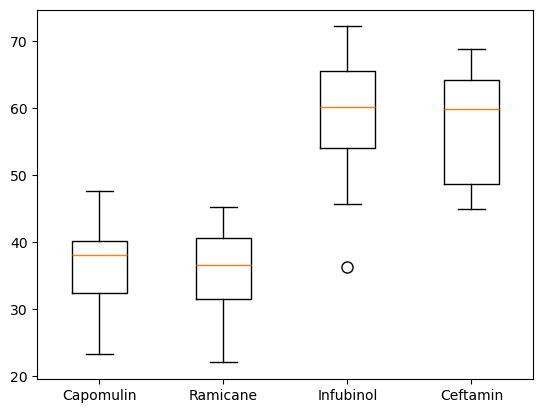

In [65]:
#Draft the outlier plot. 
plt.boxplot(last_tum_vol, labels = drug_options, flierprops=dict(markersize = 8))
plt.show


## Line and Scatter Plots

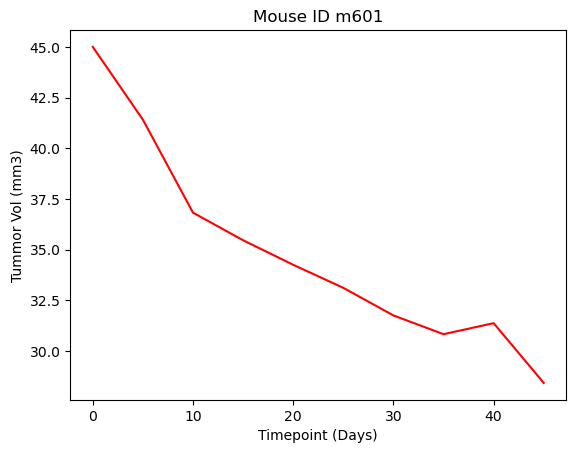

In [ ]:
# Generate a line plot of tumor volume vs. time point for mouse m601 treated with Capomulin
capomulin_mousem601 = capomulin_df.loc[capomulin_df["Mouse ID"]=="m601"]
x_timepoints = capomulin_mousem601["Timepoint"]
y_tumorvol = capomulin_mousem601["Tumor Volume (mm3)"]
plt.plot(x_timepoints, y_tumorvol, color="red")
plt.title("Mouse ID m601")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tummor Vol (mm3)")
plt.show()

# plt.show()

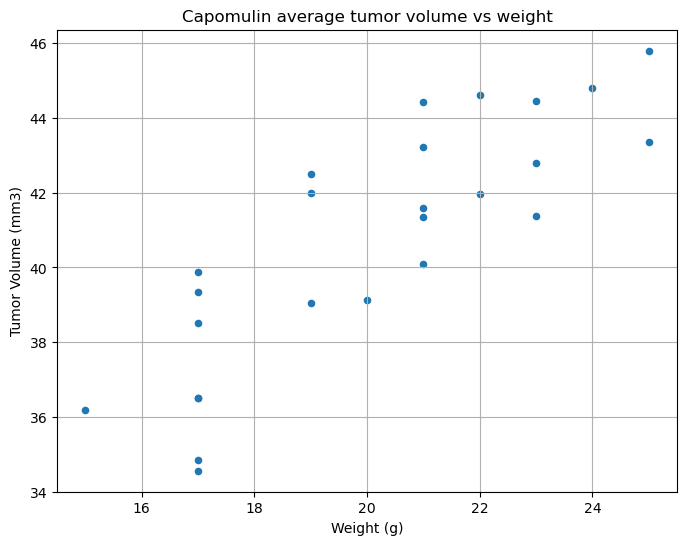

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimenca
# Bringin the weight by mouse using Capomulin
capomulin_ave_weight = capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()

#Calculate hte average Tummor Volume in mm3 by mouse using Capomulin
capomulin_ave_tumor = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Create a single dataframe with the results above to be able to draft a scatter plot
capomulin_ave_tumor_weight = pd.concat([capomulin_ave_weight,capomulin_ave_tumor],axis=1)

#Formulate the Scatter plot.
scatter_plot_capomulin =capomulin_ave_tumor_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,6), title="Capomulin average tumor volume vs weight")



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_ave_tumor_weight["Weight (g)"],capomulin_ave_tumor_weight["Tumor Volume (mm3)"])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)

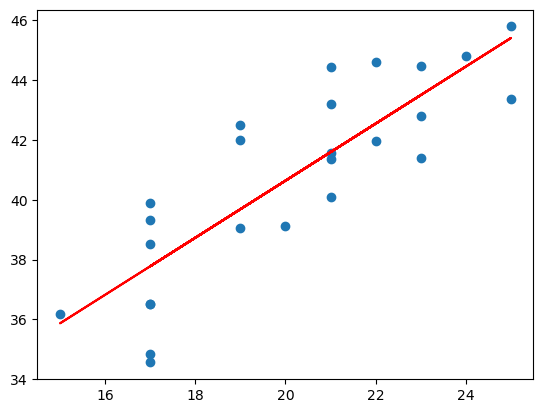

In [ ]:
# scatter_plot_capomulin drug
# st.pearsonrr(merged_cleaned_capomuline["Weight (g)"],merged_cleaned_capomulin[""])
x_values = capomulin_ave_tumor_weight["Weight (g)"]
y_values = capomulin_ave_tumor_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")